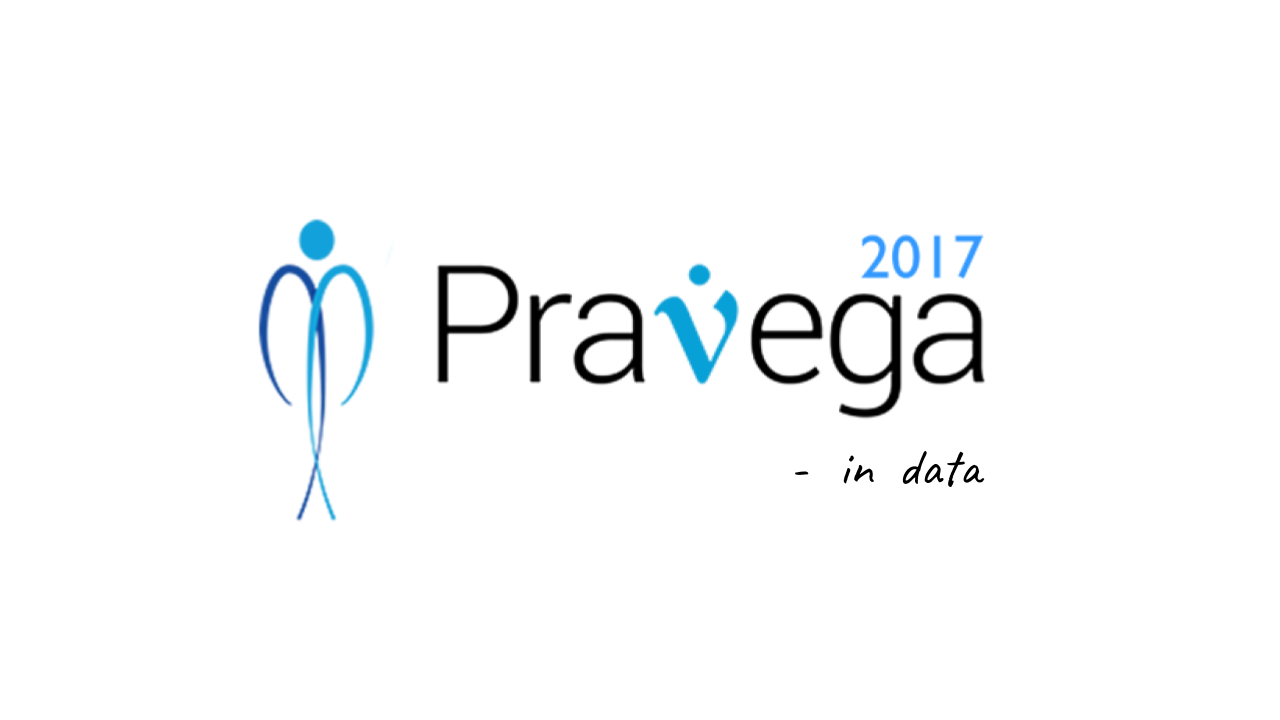

In [1]:
from IPython.display import Image
Image('title.png')

# Pravega '17 in Data
### A short introduction to Data Science in Python using Pravega '17 online registration data
#### Rohith KMS

# Some things you'll (hopefully) take away from this talk

- How to ask questions about data, and how to answer them.
- An idea about the general workflow of a Data Scientist
- The undisputable fact that Python is the coolest language on the planet
- An overview of the tools used for data analysis in python
- The power of Jupyter notebooks in Data Analysis.
- An idea of how to use Data Analysis in your own area of interest.

# The Libraries

- pandas
- numpy
- matplotlib
- basemap (For some geographical plots)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

# Pandas

- The definitive python Data Science Library. 
- Extremely powerful. Querying, Sorting and modfying data easy and efficient.
- Central data structures - DataFrame and Series
- Well-written pandas code is lovingly called 'Pandorable'

# Matplotlib

- Python's plotting library.
- Can do pretty much any imaginable kind of plot.
- As good as, if not better, than MATLAB plotting functionality. 

# Seaborn

- Another plotting library built on matplotlib
- Basically matplotlib, but with better formatting, colors and ease of use

# Basemap

- A cool toolkit from matplotlib for plotting geographical data.

# The Data

### It's in the form of an excel file. Let's import it.

In [3]:
df = pd.read_excel('Online Registrations Collegefever 2017.xlsx')
df.head(4)

Name                                        Email  \
0  BISHWAJEET KUMAR SINGH                         bksinghdhn@gmail.com   
1         N S Chiranjeevi  ns.chiranjeevi@students.iisertirupati.ac.in   
2         N S Chiranjeevi  ns.chiranjeevi@students.iisertirupati.ac.in   
3            Shashank K M                     shashank009.95@gmail.com   

    ContactNo                                College / City Name  \
0  9206821450                                          BANGALORE   
1  8792877680  Indian Institute of Science Education and Rese...   
2  8792877680  Indian Institute of Science Education and Rese...   
3  9880711530                      St. Joseph College, Bangalore   

            Ticket name TCFRegistrationId  TicketPrice  \
0  General Registration           5582JE5          205   
1  General Registration           3PPAHDT          205   
2              Big Data           3PPAHDT         1500   
3              Big Data           PSAXT4E         1500   

                   RegisteredOn  
0  Wed Nov 16 17:19:22 IST 2016  
1  Tue Nov 22 08:59:26 IST 2016  
2  Tue Nov 22 08:59:26 IST 2016  
3  Wed Nov 30 20:54:34 IST 2016

# Exploratory Data Analysis

### Understanding your data and asking questions

- How many registrations in total?
- What are the different workshops?
- How many colleges participated? How many cities?
- What are the ticket prices like?
- How did the number of registrations change as a function fo time?
- Do we have more participation from South India? If so, how much more?

In [4]:
# Some answers.

print('We had ', df.shape[0], ' Registrations\n')
print('The different ticket names are: \n')

for thing in (df['Ticket name'].unique()):
    print(thing)

We had  1577  Registrations

The different ticket names are: 

General Registration
Big Data
Cyber Forensics
Internet of Things
Android Controlled Robotics
Game Development using Virtual Reality
Automobile and IC Engine Design
Theatre Improv
Touch and Augmented Reality
Drone Photography
Quadcopter Workshop
Pravega Accommodation for 2 nights
Spray Paint Art


# Data cleaning

The least exciting, but necessary part in the workflow of a Data Scientist. Get rid of what you don't need. Make sure what you do need is in a nice format. For example,

- 'RegisteredOn' column: Convert string type to DateTime type
- The 'College Name/City column' requires some extensive text editing.
- City names need to be extracted and separated from College name.

In [5]:
# Data cleaning.

# into df_lesser, wksp_count, locations, location_counts
# wksp_location_counts, wksp_pmf

# Also show locations.groupby('City').count()

# Drop unnecessary columns
df_lesser = df.drop(axis=1, labels=['ContactNo', 'Email'])

#change index to TCFRegistrationId
df_lesser = df_lesser.set_index('TCFRegistrationId')

# Change string to DateTime and change timezone to Asia/Kolkata
df_lesser.RegisteredOn = (pd.to_datetime(df_lesser.RegisteredOn)
                          .apply(lambda x: x.tz_localize('Asia/Kolkata')))

# Count participants in each workshop

wksp_count = df_lesser[(df_lesser['Ticket name'] != 'General Registration')
                       & (df_lesser['Ticket name'] != 'Pravega Accommodation for 2 nights') 
                      ]['Ticket name'].value_counts()
wksp_count.name = '# of Registrations'

# Geographical Data (City names)

geo_data = df_lesser.set_index('Ticket name')['College / City Name']
names = geo_data.unique()

locations = pd.DataFrame(geo_data)
locations['City'] = None
locations = locations.rename(columns = {'College / City Name': 'College'})

# A crapload of text editing

locations.loc[locations['College'].str.contains('[Bb][Aa][Nn][Gg][Aa][Ll][Oo][Rr][Ee]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('[Bb][Ee][Nn][Gg][Aa][Ll][Uu][Rr][Uu]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('[Gg][Uu][Nn][Tt][Uu][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Mm][Yy][Ss][Oo][Rr][Ee]'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('[Mm][Yy][Ss][Uu][Rr][Uu]'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('[Mm][Aa][Nn][Gg][Aa][Ll][Oo][Rr][Ee]'), 'City'] = 'Mangalore'
locations.loc[locations['College'].str.contains('[Mm][Ee][Nn][Gg][Aa][Ll][Uu][Rr][Uu]'), 'City'] = 'Mangalore'
locations.loc[locations['College'].str.contains('[Cc][Oo][Ii][Mm][Bb][Aa][Tt][Oo][Rr][Ee]'), 'City'] = 'Coimbatore'
locations.loc[locations['College'].str.contains('[Cc][Hh][Ee][Nn][Nn][Aa][Ii]'), 'City'] = 'Chennai'
locations.loc[locations['College'].str.contains('CHOWDAVARAM'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Hh][Yy][Dd][Ee][Rr][Aa][Bb][Aa][Dd]'), 'City'] = 'Hyderabad'
locations.loc[locations['College'].str.contains('[Nn][Aa][Rr][Aa][Ss]'), 'City'] = 'Narasaraopeta'
locations.loc[locations['College'].str.contains('[Bb][Aa][Rr][Ee][Ii]'), 'City'] = 'Bareilly'
locations.loc[locations['College'].str.contains('[Aa][Nn][Aa][Nn][Tt]'), 'City'] = 'Anantapur'
locations.loc[locations['College'].str.contains('[Gg][Hh][Aa][Zz]'), 'City'] = 'Ghaziabad'
locations.loc[locations['College'].str.contains('[Tt][Ii][Rr][Uu][Pp]'), 'City'] = 'Tirupati'
locations.loc[locations['College'].str.contains('[Ss][Aa][Tt][Nn]'), 'City'] = 'Satna'
locations.loc[locations['College'].str.contains('[Hh][Aa][Ss][Ss]'), 'City'] = 'Hassan'
locations.loc[locations['College'].str.contains('[Mm][Aa][Cc][Hh][Ii]'), 'City'] = 'Machilipatnam'
locations.loc[locations['College'].str.contains('[Dd][Oo][Dd][Dd]'), 'City'] = 'Doddaballapur'
locations.loc[locations['College'].str.contains('[Nn][Aa][Gg][Dd]'), 'City'] = 'Nagdenahalli'
locations.loc[locations['College'].str.contains('[Vv][Ii][Nn][Jj]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Tt][Rr][Ii]'), 'City'] = 'Trichy'
locations.loc[locations['College'].str.contains('[Pp][Uu][Dd][Uu][Cc]'), 'City'] = 'Puducherry'
locations.loc[locations['College'].str.contains('[Ss][Aa][Ll][Ee]'), 'City'] = 'Salem'
locations.loc[locations['College'].str.contains('[Mm][Aa][Nn][Ii]'), 'City'] = 'Manipal'
locations.loc[locations['College'].str.contains('[Bb][Ii][Jj][Aa]'), 'City'] = 'Bijapur'
locations.loc[locations['College'].str.contains('[Kk][Oo][Ll][Ll]'), 'City'] = 'Kollam'
locations.loc[locations['College'].str.contains('[Ss][Ii][Vv][Aa]'), 'City'] = 'Sivakasi'

# Of course, some people forgot to fill the CITY NAME IN THE COLLEGE/CITY COLUMN ! !@#$%^

locations.loc[locations['College'].str.contains('St. ?[Jj]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('[Rr][Vv][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Bb][Mm][Ss]'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('Sir M'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('Sri Jayachamarajendra'), 'City'] = 'Mysore'
locations.loc[locations['College'].str.contains('Sir M'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('IIT B'), 'City'] = 'Mumbai'
locations.loc[locations['College'].str.contains('bang'), 'City'] = 'Bangalore'
locations.loc[locations['College'].str.contains('BELG'), 'City'] = 'Belgaum'
locations.loc[locations['College'].str.contains('VIJA'), 'City'] = 'Vijayapura'
locations.loc[locations['College'].str.contains('Tirua'), 'City'] = 'Tirupati'
locations.loc[locations['College'].str.contains('[Ss][Aa][Tt][Hh][Yy][Aa]'), 'City'] = 'Chennai'
locations.loc[locations['College'].str.contains('[Rr][ .][Vv][ .][Rr]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('[Mm][Ee][Gg][Hh][Aa]'), 'City'] = 'Guntur'
locations.loc[locations['College'].str.contains('SS Institute of Medical Sciences'), 'City'] = 'Devanegere'
locations.loc[locations['College'].str.contains('SASTRA'), 'City'] = 'Thanjavur'

# Alright. A man can have only so much patience.

locations.loc[locations['City']=='Unfilled',  'City'] = 'Bangalore'

# Finally, location counts.

location_counts = locations.groupby('City').count()

wksp_location_counts = pd.pivot_table(locations, 
                                      values = 'College',
                                      index = ['City'],
                                      columns = ['Ticket name'],
                                      aggfunc = 'count').fillna(0)

wksp_pmf = (wksp_location_counts
            .drop(axis=1, 
                  labels=['General Registration', 
                          'Pravega Accommodation for 2 nights']))

wksp_pmf = wksp_pmf.apply(lambda row: row/row.sum(), axis=1).fillna(0)

# Phew. Data cleaning done.


In [28]:
# Displaying the clean data skipping the messy code to avoid demotivation.

print('The cleaner ones: ')
df_lesser.head(3)

The cleaner ones: 


Name  \
TCFRegistrationId                           
5582JE5            BISHWAJEET KUMAR SINGH   
3PPAHDT                   N S Chiranjeevi   
3PPAHDT                   N S Chiranjeevi   

                                                 College / City Name  \
TCFRegistrationId                                                      
5582JE5                                                    BANGALORE   
3PPAHDT            Indian Institute of Science Education and Rese...   
3PPAHDT            Indian Institute of Science Education and Rese...   

                            Ticket name  TicketPrice              RegisteredOn  
TCFRegistrationId                                                               
5582JE5            General Registration          205 2016-11-16 11:49:22+05:30  
3PPAHDT            General Registration          205 2016-11-22 03:29:26+05:30  
3PPAHDT                        Big Data         1500 2016-11-22 03:29:26+05:30

In [7]:
wksp_count

Internet of Things                        196
Big Data                                  194
Quadcopter Workshop                       152
Cyber Forensics                           146
Automobile and IC Engine Design           129
Android Controlled Robotics               124
Touch and Augmented Reality               108
Game Development using Virtual Reality     57
Theatre Improv                             27
Spray Paint Art                            12
Drone Photography                          11
Name: # of Registrations, dtype: int64

In [8]:
locations.head(6)

College  \
Ticket name                                                               
General Registration                                          BANGALORE   
General Registration  Indian Institute of Science Education and Rese...   
Big Data              Indian Institute of Science Education and Rese...   
Big Data                                  St. Joseph College, Bangalore   
Big Data                                    St.Joseph College Bangalore   
Big Data                                  St.Joseph's College,Bangalore   

                           City  
Ticket name                      
General Registration  Bangalore  
General Registration   Tirupati  
Big Data               Tirupati  
Big Data              Bangalore  
Big Data              Bangalore  
Big Data              Bangalore

In [9]:
location_counts.head(6).rename(columns = {'College': 'Registrations'})

Registrations
City                    
Anantapur             82
Bangalore            301
Bareilly               1
Belgaum                2
Bijapur                7
Chennai               51

In [10]:
wksp_location_counts.head(6)

Ticket name  Android Controlled Robotics  Automobile and IC Engine Design  \
City                                                                        
Anantapur                           23.0                              6.0   
Bangalore                           33.0                             23.0   
Bareilly                             0.0                              0.0   
Belgaum                              0.0                              2.0   
Bijapur                              0.0                              6.0   
Chennai                              3.0                              0.0   

Ticket name  Big Data  Cyber Forensics  Drone Photography  \
City                                                        
Anantapur         3.0              8.0                0.0   
Bangalore        45.0             23.0                0.0   
Bareilly          0.0              0.0                0.0   
Belgaum           0.0              0.0                0.0   
Bijapur           0.0              0.0                0.0   
Chennai          14.0              7.0                0.0   

Ticket name  Game Development using Virtual Reality  General Registration  \
City                                                                        
Anantapur                                       8.0                   9.0   
Bangalore                                      16.0                  79.0   
Bareilly                                        0.0                   0.0   
Belgaum                                         0.0                   0.0   
Bijapur                                         0.0                   0.0   
Chennai                                         1.0                   7.0   

Ticket name  Internet of Things  Pravega Accommodation for 2 nights  \
City                                                                  
Anantapur                   0.0                                25.0   
Bangalore                  16.0                                17.0   
Bareilly                    0.0                                 0.0   
Belgaum                     0.0                                 0.0   
Bijapur                     0.0                                 0.0   
Chennai                     1.0                                18.0   

Ticket name  Quadcopter Workshop  Spray Paint Art  Theatre Improv  \
City                                                                
Anantapur                    0.0              0.0             0.0   
Bangalore                    9.0              6.0             3.0   
Bareilly                     1.0              0.0             0.0   
Belgaum                      0.0              0.0             0.0   
Bijapur                      1.0              0.0             0.0   
Chennai                      0.0              0.0             0.0   

Ticket name  Touch and Augmented Reality  
City                                      
Anantapur                            0.0  
Bangalore                           31.0  
Bareilly                             0.0  
Belgaum                              0.0  
Bijapur                              0.0  
Chennai                              0.0

In [11]:
wksp_pmf.head(6)

Ticket name  Android Controlled Robotics  Automobile and IC Engine Design  \
City                                                                        
Anantapur                       0.479167                         0.125000   
Bangalore                       0.160976                         0.112195   
Bareilly                        0.000000                         0.000000   
Belgaum                         0.000000                         1.000000   
Bijapur                         0.000000                         0.857143   
Chennai                         0.115385                         0.000000   

Ticket name  Big Data  Cyber Forensics  Drone Photography  \
City                                                        
Anantapur    0.062500         0.166667                0.0   
Bangalore    0.219512         0.112195                0.0   
Bareilly     0.000000         0.000000                0.0   
Belgaum      0.000000         0.000000                0.0   
Bijapur      0.000000         0.000000                0.0   
Chennai      0.538462         0.269231                0.0   

Ticket name  Game Development using Virtual Reality  Internet of Things  \
City                                                                      
Anantapur                                  0.166667            0.000000   
Bangalore                                  0.078049            0.078049   
Bareilly                                   0.000000            0.000000   
Belgaum                                    0.000000            0.000000   
Bijapur                                    0.000000            0.000000   
Chennai                                    0.038462            0.038462   

Ticket name  Quadcopter Workshop  Spray Paint Art  Theatre Improv  \
City                                                                
Anantapur               0.000000         0.000000        0.000000   
Bangalore               0.043902         0.029268        0.014634   
Bareilly                1.000000         0.000000        0.000000   
Belgaum                 0.000000         0.000000        0.000000   
Bijapur                 0.142857         0.000000        0.000000   
Chennai                 0.000000         0.000000        0.000000   

Ticket name  Touch and Augmented Reality  
City                                      
Anantapur                        0.00000  
Bangalore                        0.15122  
Bareilly                         0.00000  
Belgaum                          0.00000  
Bijapur                          0.00000  
Chennai                          0.00000

# Visualisation

The next important step in a Data Scientist's workflow is the visualisation.

- Visualising your data is an important step in Data Analysis. It helps us find patterns that we would otherwise have missed
- Data Visualisation is often the best means of conveying your results to an audience.
- Hence, Data visualisation is both an analytical and communicative tool.

Let's make some plots.

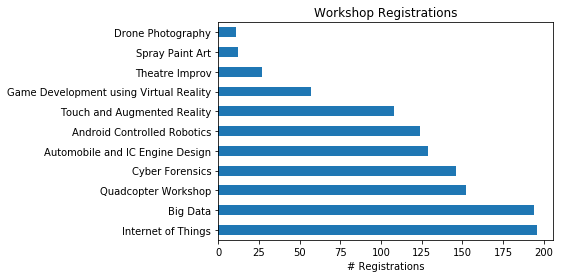

In [32]:
%matplotlib inline
wksp_count.plot(kind = 'barh')

plt.xlabel('# Registrations')
plt.title('Workshop Registrations')
plt.show()

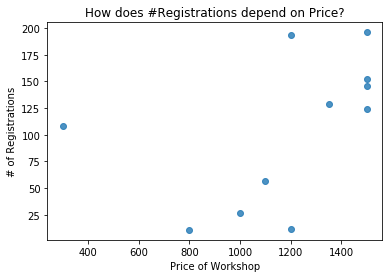

In [33]:
prices = df_lesser.drop_duplicates('Ticket name').set_index('Ticket name')
prices = prices[['TicketPrice']]
prices = prices.drop(['General Registration', 'Pravega Accommodation for 2 nights'])

prices = prices.TicketPrice
prices.name = 'Price of Workshop'

sns.regplot(prices, wksp_count, fit_reg=False)
plt.title('How does #Registrations depend on Price?')
plt.show()

Change the fit_reg parameter to 1 and demonstrate.

# Time Series Analysis

We have some nice Time Series Data. Let's use it.

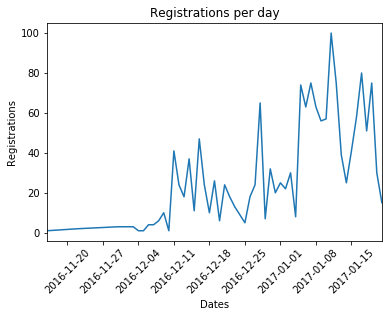

In [14]:
df_dt = df_lesser.set_index('RegisteredOn')[['TicketPrice', 'Ticket name']]

df_dt['Ticket name'].groupby(df_dt.index.date).count().plot()
plt.tick_params('x', rotation = 45)

plt.xlabel('Dates')
plt.ylabel('Registrations')
plt.title('Registrations per day')

plt.show()

# Why are we doing this?

Now, prepare to get your minds blown. (Or not, depending if you dig this sort of thing.)

Let's just mark some important publicity events on this time-series.

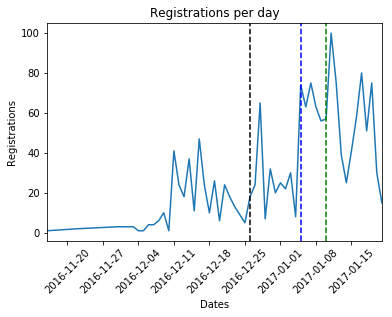

In [15]:
df_dt = df_lesser.set_index('RegisteredOn')[['TicketPrice', 'Ticket name']]
df_dt['Ticket name'].groupby(df_dt.index.date).count().plot()
plt.tick_params('x', rotation = 45)
plt.xlabel('Dates')
plt.ylabel('Registrations')
plt.title('Registrations per day')
plt.axvline(pd.to_datetime('26 December 2016'), color = 'k', linestyle = '--') # Nucleya/Biswa Pravega post
plt.axvline(pd.to_datetime('5 January 2017'), color = 'b', linestyle = '--')   # Nucleya page post
plt.axvline(pd.to_datetime('10 January 2017'), color = 'g', linestyle = '--')  # Nucleya High Ape post

plt.show()

### and moving on
# Geographical Data Analysis

We've seen the temporal stuff. Time to focus on the other three dimensions.

In [16]:
# Some latitude-longitude stuff

resize_factor = 400

lats = [14.68, # Anantpur
        12.97, # Bangalore
        28.36, # Bareilly
        15.85, # Belgaum
        16.83, # Bijapur
        13.08, # Chennai
        11.01, # Coimbatore
        14.46, # Devanegere
        13.29, # Doddabellapur
        28.67, # Ghaziabad
        16.30, # Guntur
        13.00, # Hassan
        17.38, # Hyderabad
        8.89,  # Kollam
        16.19, # Machilipatnam
        12.91, # Mangalore
        13.36, # Manipal
        19.07, # Mumbai
        12.30, # Mysore
        13.28, # Nagdenahalli
        16.23, # Narasaraopeta
        11.91, # Puducherry
        11.66, # Salem
        24.60, # Satna
        9.45,  # Sivakasi
        10.78, # Thanjavur
        13.62, # Tirupati
        10.79, # Trichy
        13.29  # Vijayapura       
       ]
lons = [77.6,  # Anantpur
        77.59, # Bangalore
        79.43, # Bareilly
        74.50, # Belgaum
        75.71, # Bijapur
        80.27, # Chennai
        76.95, # Coibatore
        75.92, # Devanegere
        77.54, # Doddabellapur
        77.45, # Ghaziabad
        80.43, # Guntur
        76.09, # Hassan
        78.48, # Hyderabad
        76.61, # Kollam
        81.13, # Machilipatnam
        74.85, # Mangalore
        74.78, # Manipal
        72.88, # Mumbai
        76.64, # Mysore
        77.58, # Nagdenahalli
        80.05, # Narasaraopeta
        79.81, # Puducherry
        78.14, # Salem
        80.83, # Satna
        77.80, # Sivakasi
        79.13, # Thanjavur
        79.41, # Tirupati
        78.70, # Trichy
        77.80  # Vijayapura    
        ]

sizes = location_counts['College']/location_counts['College'].sum()*resize_factor

<IPython.core.display.Javascript object>


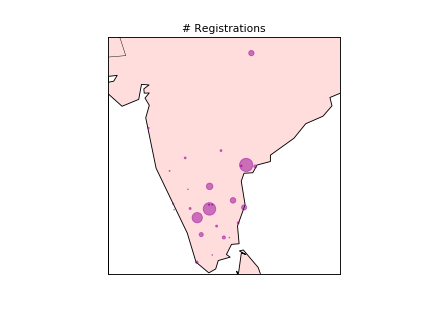

/home/rohith/installations/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/rohith/installations/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [38]:
%matplotlib notebook
m = Basemap(projection='mill',  # Miller projection 
            resolution='c',     # Crude resolution
            llcrnrlat = 8, llcrnrlon = 65, urcrnrlat = 40, urcrnrlon = 100) 
m.drawcountries()
m.drawmapboundary(color='#000000')
m.fillcontinents(color = '#FFDDDD', lake_color = '#FFFFFF')
m.drawcoastlines()
x,y = m(lons, lats)
m.scatter(x,y,marker = 'o', c = '#990099', alpha = 0.5, zorder = 5, s = sizes*2)
plt.title('# Registrations')
plt.show()

# Takeaway
### Data can be used to make better decisions

# Building models

Another step in the Data Scientist's workflow (Some argue that this is the key difference between data scientists and statisticians) is building models.

Statisticians tend to focus more on inferential models, and Data Scientists tend to focus on predictive models. [ Not my personal opinion. ]

# Types of predictive models

There are various kinds of predictive models one can try to build, and each of those is suited for a certain kind of problem. Some commononly used models are,

- Linear regression
- Artificial Neural Networks (ANN)
- Support vector means (SVM)
- K-Means clustering

You get the idea.

## Example model

# Recommending workshops based on location

Some workshops tend to be more popular than others in different cities. (We can expect significant differences across different colleges too, but let's keep things simple. (Read: I'm kinda lazy)

Let's take a look at how we go about building such a recommender.

[One that is not nearly as complex as some other recommenders out there]

In [18]:
locations = locations.reset_index()

In [19]:
def recommend(city, n):
    
    print('\n\nWorkshop recommendations for ', city, '\n')
    
    if city in location_counts.index:
        for workshop in wksp_pmf.loc[city].sort_values(ascending = False).head(n).index:
            print(workshop)
            
    else:
        for i in (locations.T
                  .loc['Ticket name']
                  .value_counts()
                  .drop(['General Registration', 'Pravega Accommodation for 2 nights'])
                  .head(n)
                  .index):
            print(i)
            

In [20]:
recommend('Salem', 3)       # In the list of cities
recommend('Vijayawada', 3)  # Not in the list of cities



Workshop recommendations for  Salem 

Game Development using Virtual Reality
Touch and Augmented Reality
Theatre Improv


Workshop recommendations for  Vijayawada 

Internet of Things
Big Data
Quadcopter Workshop


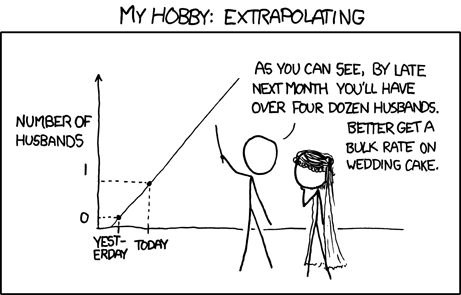

In [21]:
Image('xkcd_extrapolation.png')

# Questions?